In [1]:
from pylab import np
import matplotlib.pyplot as plt

In [56]:

N = 1000 # number of steps (ball)
dt = 1.e-7 # free fall time (ball)
tf = dt*float(N) # time step [s]

g = 9.8 # grav. acceleration m/s^2
yo = 0.0 # initial position [m]
vo = 0.0 # inital velocity [m/s]
boverM = 2.4e5 # quadratic drag coeff / objects mass 
coverM = 5.6e4 # linear drag coeff / objects mass

In [57]:
def euler(yi, ti, dt, derivs): # Euler method y_i -> y_i+1
    yiplus1 = yi + derivs(yi,ti) * dt
    return yiplus1

def freefall( y, time): # calc differentials
    diff0 = y[1] 
    diff1 = - g + boverM*abs(y[1]) 
    #diff1 = - g + coverM*y[1]*y[1] 
    return np.array([diff0, diff1])

In [58]:
t = np.linspace(0, tf, N) # Nx1 evenly spaced t_i time array
y = np.zeros([N,2]) # Nx2 array (N rows, 2 columns) for y_i, v_i state
y[0,0] = yo
y[0,1] = vo

In [59]:
for j in range(N-1): # Loop over steps
    y[j+1] = euler(y[j], t[j], dt, freefall)

yn = y[:,0]
vn = y[:,1]

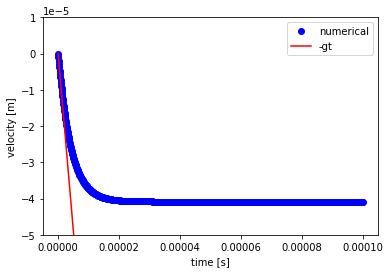

In [62]:
va = vo - g*t
plt.plot(t, vn, "bo",label="numerical")
plt.plot(t, va, "r",label="-gt")
plt.xlabel ('time [s]')
plt.ylabel ('velocity [m]')
plt.ylim(-5.e-5,1.0e-5)
plt.legend()

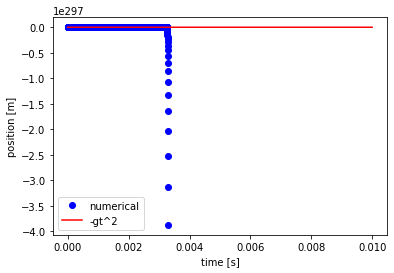

In [6]:
ya = vo*t - 0.5*g*t*t
plt.plot(t, yn, "bo",label="numerical")
plt.plot(t, ya, "r",label="-gt^2")
plt.xlabel ('time [s]')
plt.ylabel ('position [m]')
plt.legend()

Text(0, 0.5, 'velocity [m/s]')

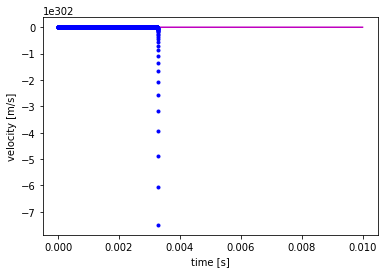

In [7]:
va = -g*t
plt.plot(t, va, "m")
plt.plot(t, vn, "b.")
plt.xlabel ('time [s]')
plt.ylabel ('velocity [m/s]')